# Import the Pandas library


In [1]:
import pandas as pd

In [95]:
df = pd.read_csv("results1000.csv")
df

,ALGORITHM,ELEMENT ARRAY TYPE,ARRAY ORDER,START TIME,END TIME,ELAPSED TIME
0,PassPerItem,int,random,153003413079123,153003418321103,5241980
1,UntilNoChange,int,random,153003419105951,153003423920295,4814344
2,WhileNeeded,int,random,153003424119309,153003427596254,3476945
3,PassPerItem,int,random,153003427883913,153003433398297,5514384
4,UntilNoChange,int,random,153003433614416,153003438402030,4787614
...,...,...,...,...,...,...
15745,UntilNoChange,Byte,equal,153073836849008,153073836854140,5132
15746,WhileNeeded,Byte,equal,153073836865860,153073836870808,4948
15747,PassPerItem,Byte,equal,153073836883727,153073839978068,3094341
15748,UntilNoChange,Byte,equal,153073840022155,153073840031126,8971


# Visualization

In [4]:
import seaborn as sns

### Distribution of Accuracy (over everything, not distinguishing between Devices or Tasks)

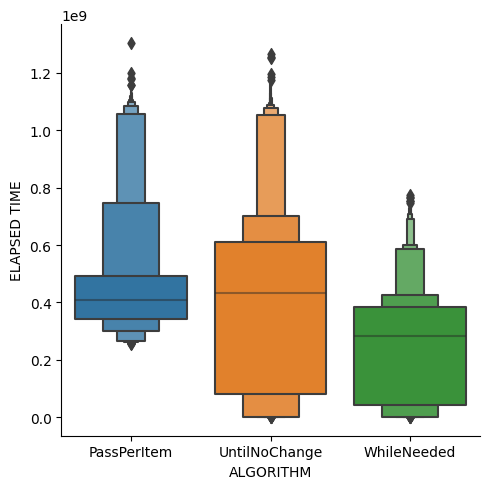

In [49]:
sns.catplot(data=df, y="ELAPSED TIME",x="ALGORITHM", kind="boxen")

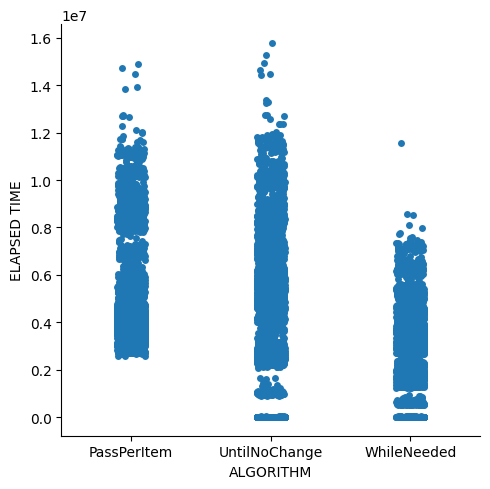

In [8]:
sns.catplot(data=df, y="ELAPSED TIME",x="ALGORITHM", jitter=True)

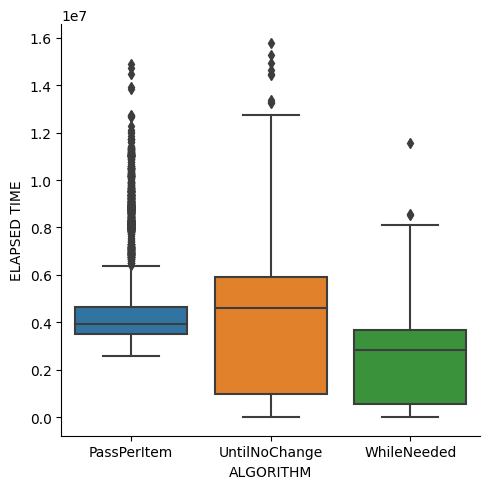

In [9]:
sns.catplot(data=df, y="ELAPSED TIME",x="ALGORITHM", kind="box")

### Accuracy Difference between Mouse and Trackpad

##### The above plot (automatically) cropped the y-axis so 0 is not visible. This is dangerous. A careless reader may not realize that the plot is zoomed in, and the differences along the y-axis are smaller than they might appear.

### Accuracy Difference between Click and Drag

### Accuracy Difference between Mouse and Trackpad, and Click and Drag

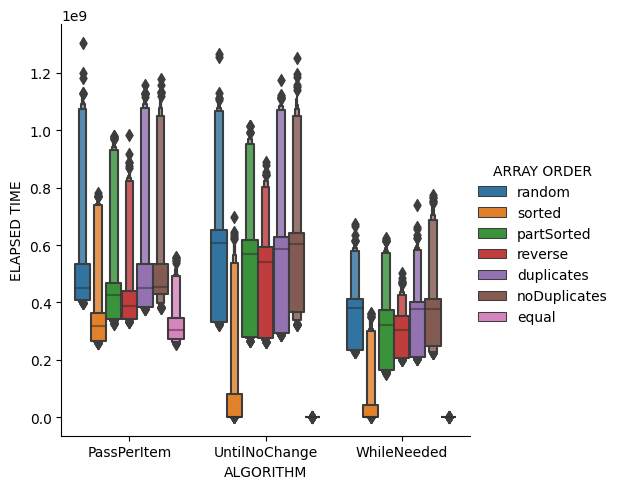

In [50]:
# hue groups variables that will produce points with different colors
ax = sns.catplot(data=df, y="ELAPSED TIME",x="ALGORITHM", hue="ARRAY ORDER", kind="boxen")

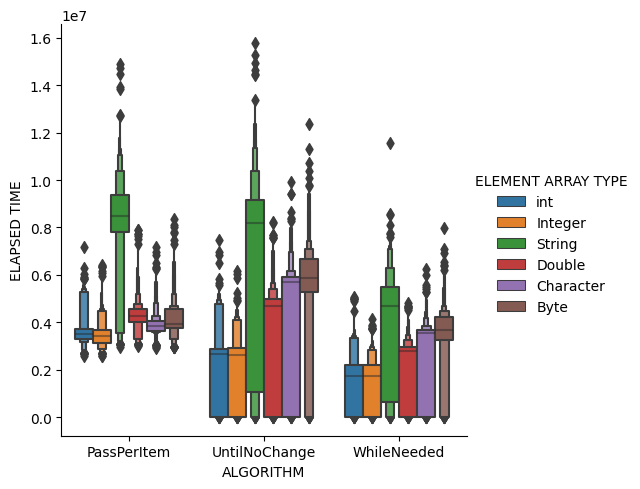

In [47]:
ax = sns.catplot(data=df, y="ELAPSED TIME",x="ALGORITHM", hue="ELEMENT ARRAY TYPE", kind="boxen")


# Accuracy vs Duration
##### Is there a connection between accuracy and duration?

STANDARD DEVIATION

In [96]:
algo1 = df[df["ALGORITHM"] == "PassPerItem"]
algo2 = df[df["ALGORITHM"] == "UntilNoChange"]
algo3 = df[df["ALGORITHM"] == "WhileNeeded"]

std_algo1 = algo1["ELAPSED TIME"].std()
std_algo2 = algo2["ELAPSED TIME"].std()
std_algo3 = algo3["ELAPSED TIME"].std()

print("Algorithm 1 STD: ", round(std_algo1,2))
print("Algorithm 2 STD: ", round(std_algo2,2))
print("Algorithm 3 STD: ", round(std_algo3,2))


std_algorithms = {
    'Algorithm': ['PassPerItem', 'UntilNoChange', 'WhileNeeded'],
    'STD-MEAN': [std_algo1, std_algo2, std_algo3]
}

result_algorithm = pd.DataFrame(std_algorithms)
result_algorithm


Algorithm 1 STD:  1940991.21
Algorithm 2 STD:  3019102.53
Algorithm 3 STD:  1847856.66


,Algorithm,STD-MEAN
0,PassPerItem,1.940991e+06
1,UntilNoChange,3.019103e+06
2,WhileNeeded,1.847857e+06


In [98]:
item = ["PassPerItem","UntilNoChange","WhileNeeded"]\

result_df_type = pd.DataFrame()

for it in item:
  df_algo = df[df["ALGORITHM"] == it]

  # Calculate standard deviation for each element array type
  std_values = {
      'Algorithm': [it],
      'int': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "int"]["ELAPSED TIME"].std()],
      'Integer': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "Integer"]["ELAPSED TIME"].std()],
      'String': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "String"]["ELAPSED TIME"].std()],
      'Double': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "Double"]["ELAPSED TIME"].std()],
      'Character': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "Character"]["ELAPSED TIME"].std()],
      'Byte': [df_algo[df_algo["ELEMENT ARRAY TYPE"] == "Byte"]["ELAPSED TIME"].std()]
    }

  result_df_type = result_df_type.append(pd.DataFrame(std_values), ignore_index=True)

result_df_type

<ipython-input-98-85c79a97837c>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_type = result_df_type.append(pd.DataFrame(std_values), ignore_index=True)
<ipython-input-98-85c79a97837c>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_type = result_df_type.append(pd.DataFrame(std_values), ignore_index=True)
<ipython-input-98-85c79a97837c>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_type = result_df_type.append(pd.DataFrame(std_values), ignore_index=True)


,Algorithm,int,Integer,String,Double,Character,Byte
0,PassPerItem,7.995215e+05,6.315390e+05,2.295240e+06,6.899562e+05,4.955143e+05,7.572905e+05
1,UntilNoChange,1.662193e+06,1.500949e+06,4.041980e+06,2.314069e+06,2.757095e+06,2.362386e+06
2,WhileNeeded,1.178924e+06,1.054450e+06,2.460777e+06,1.389013e+06,1.691475e+06,1.498286e+06


In [100]:
item = ["PassPerItem","UntilNoChange","WhileNeeded"]\

result_df_order = pd.DataFrame()

for it in item:
  df_algo = df[df["ALGORITHM"] == it]

  # Calculate standard deviation for each element array type
  std_values = {
      'Algorithm': [it],
      'random': [df_algo[df_algo["ARRAY ORDER"] == "random"]["ELAPSED TIME"].std()],
      'sorted': [df_algo[df_algo["ARRAY ORDER"] == "sorted"]["ELAPSED TIME"].std()],
      'partSorted': [df_algo[df_algo["ARRAY ORDER"] == "partSorted"]["ELAPSED TIME"].std()],
      'reverse': [df_algo[df_algo["ARRAY ORDER"] == "reverse"]["ELAPSED TIME"].std()],
      'duplicates': [df_algo[df_algo["ARRAY ORDER"] == "duplicates"]["ELAPSED TIME"].std()],
      'noDuplicates': [df_algo[df_algo["ARRAY ORDER"] == "noDuplicates"]["ELAPSED TIME"].std()],
      'equal': [df_algo[df_algo["ARRAY ORDER"] == "equal"]["ELAPSED TIME"].std()]
    }

  result_df_order = result_df_order.append(pd.DataFrame(std_values), ignore_index=True)

result_df_order

<ipython-input-100-521fc49beeb8>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_order = result_df_order.append(pd.DataFrame(std_values), ignore_index=True)
<ipython-input-100-521fc49beeb8>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_order = result_df_order.append(pd.DataFrame(std_values), ignore_index=True)
<ipython-input-100-521fc49beeb8>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_order = result_df_order.append(pd.DataFrame(std_values), ignore_index=True)


,Algorithm,random,sorted,partSorted,reverse,duplicates,noDuplicates,equal
0,PassPerItem,1.277251e+06,2.215919e+06,2.188921e+06,1.706121e+06,1.796638e+06,2.560165e+06,766221.722566
1,UntilNoChange,1.464948e+06,2.039140e+06,2.518468e+06,2.080716e+06,2.016234e+06,2.797802e+06,2867.538558
2,WhileNeeded,8.315899e+05,1.210039e+06,1.582457e+06,9.220978e+05,1.217676e+06,1.718695e+06,4288.405008


GRAPH STD - 3 ALGORITHM

<ipython-input-97-4f7a2227ea18>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=result_algorithm, x="Algorithm", y="STD-MEAN", ci='sd', capsize=0.1, errcolor='black', errwidth=1.5)


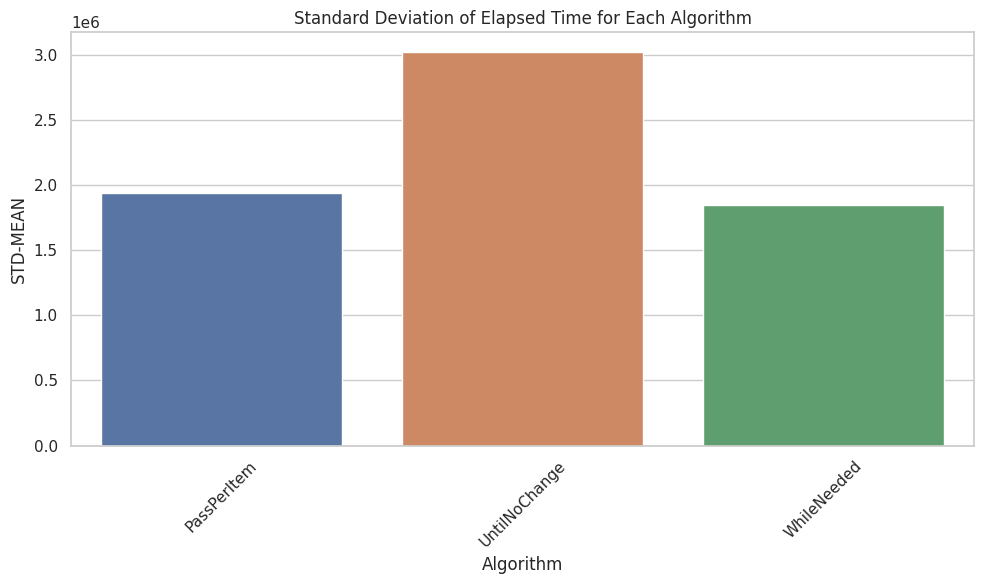

In [97]:
sns.set(style="whitegrid")  # Set the style to whitegrid for better visibility
plt.figure(figsize=(10, 6))  # Set the figure size

# Use sns.barplot directly
ax = sns.barplot(data=result_algorithm, x="Algorithm", y="STD-MEAN", ci='sd', capsize=0.1, errcolor='black', errwidth=1.5)

# Set the title and labels
ax.set(title='Standard Deviation of Elapsed Time for Each Algorithm', ylabel='STD-MEAN')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

GRAPH TYPE ITEMS

In [79]:
import matplotlib.pyplot as plt

<ipython-input-99-7d69140fe1f1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Algorithm', y='Elapsed Time', hue='Scenario', ci='sd', data=melted_df)


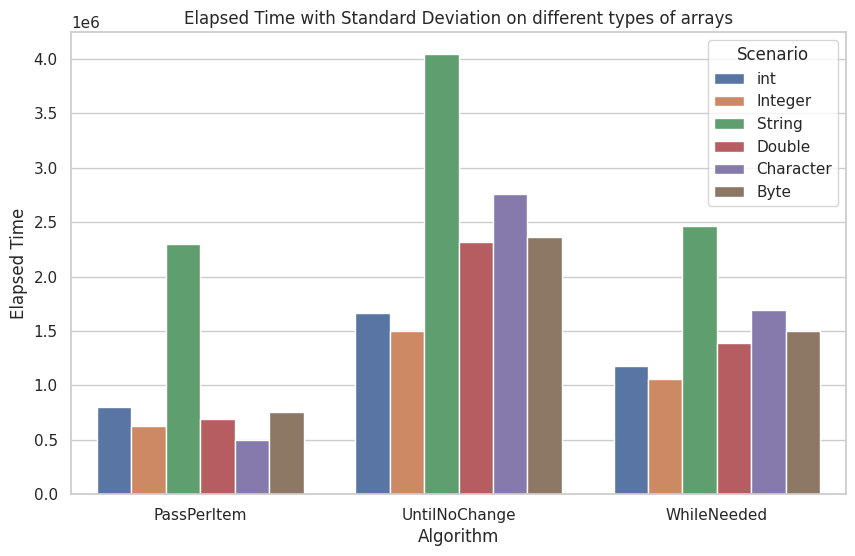

In [99]:
melted_df = pd.melt(result_df_type, id_vars=['Algorithm'], var_name='Scenario', value_name='Elapsed Time')

# Plot using sns.barplot to include standard deviation
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Algorithm', y='Elapsed Time', hue='Scenario', ci='sd', data=melted_df)
plt.title('Elapsed Time with Standard Deviation on different types of arrays')
plt.show()

GRAPH ORDER TYPES

<ipython-input-101-127b6287a8bb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Algorithm', y='Elapsed Time', hue='Scenario', ci='sd', data=melted_df)


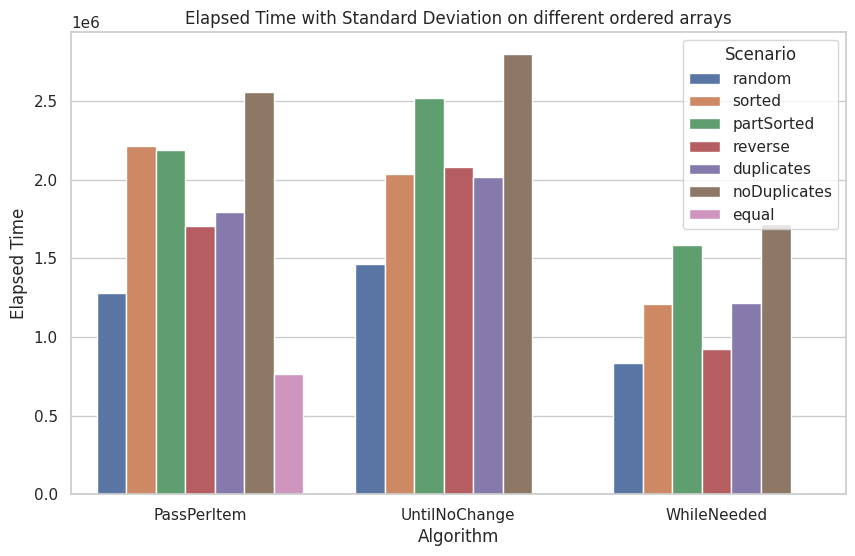

In [101]:
melted_df = pd.melt(result_df_order, id_vars=['Algorithm'], var_name='Scenario', value_name='Elapsed Time')

# Plot using sns.barplot to include standard deviation
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Algorithm', y='Elapsed Time', hue='Scenario', ci='sd', data=melted_df)
plt.title('Elapsed Time with Standard Deviation on different ordered arrays')
plt.show()